# Employee Attrition Prediction Using Machine Learning Decision Trees

## Task 1: Exploratory Data Analysis (EDA)

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

In [78]:
#load the dataset
df = pd.read_csv("employee_attrition_dataset.csv")

#Show some highlevel information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [79]:
#List the first 5 rows of the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [80]:
#List the last 5 rows of the data
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [81]:
#Show some statistical information about the data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [82]:
#Show all the columns in the dataframe
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [83]:
#Check for duplicate values
df.duplicated().sum()

0

In [84]:
#Display the unique values for the following columns
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [85]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [86]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [87]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [88]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [89]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [90]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5])

In [91]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [92]:
df['Education'].unique()

array([2, 1, 4, 3, 5])

In [93]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1])

In [94]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1])

In [95]:
df['JobInvolvement'].unique()

array([3, 2, 4, 1])

In [96]:
df['PerformanceRating'].unique()

array([3, 4])

In [97]:
df['WorkLifeBalance'].unique()

array([1, 3, 2, 4])

In [98]:
#Check for missing values in the dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [99]:
#Remove redundant columns from the dataset
df = df.drop(['EmployeeCount', 'RelationshipSatisfaction', 'StockOptionLevel', 'EmployeeNumber',
                    'Over18', 'StandardHours'], axis=1)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,Yes,11,3,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,No,23,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,Yes,15,3,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,Yes,11,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,No,12,3,6,3,3,2,2,2,2


In [100]:
#Assign some categories to some columns
education_map = {1: 'High School', 2: 'Diploma', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
environment_satisfaction_map = {1: 'Very Bad', 2: 'Bad', 3: 'Good', 4: 'Very Good'}
job_involvement_map = {1: 'Less Involved', 2: 'Neutral', 3: 'Involved', 4: 'Extremely Involved'}
job_satisfaction_map = {1: 'Very Unsatisfied', 2: 'Neutral', 3: 'Satisfied', 4: 'Extremely satisfied'}
performance_rating_map = {3: 'Good', 4: 'Outstanding'}
job_level_map = {1: 'Entry', 2: 'Junior', 3: 'Intermediate', 4: 'Senior', 5: 'Executive'}
work_life_balance_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

# Use the pandas apply method to numerically encode our attrition target variable
df['Education'] = df["Education"].apply(lambda x: education_map[x])
df['EnvironmentSatisfaction'] = df["EnvironmentSatisfaction"].apply(lambda x: environment_satisfaction_map[x])
df['JobInvolvement'] = df["JobInvolvement"].apply(lambda x: job_involvement_map[x])
df['JobSatisfaction'] = df["JobSatisfaction"].apply(lambda x: job_satisfaction_map[x])
df['PerformanceRating'] = df["PerformanceRating"].apply(lambda x: performance_rating_map[x])
df['JobLevel'] = df["JobLevel"].apply(lambda x: job_level_map[x])
df['WorkLifeBalance'] = df["WorkLifeBalance"].apply(lambda x: work_life_balance_map[x])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Diploma,Life Sciences,Bad,Female,...,Yes,11,Good,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,Good,Male,...,No,23,Outstanding,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Diploma,Other,Very Good,Male,...,Yes,15,Good,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very Good,Female,...,Yes,11,Good,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,High School,Medical,Very Bad,Male,...,No,12,Good,6,3,Better,2,2,2,2


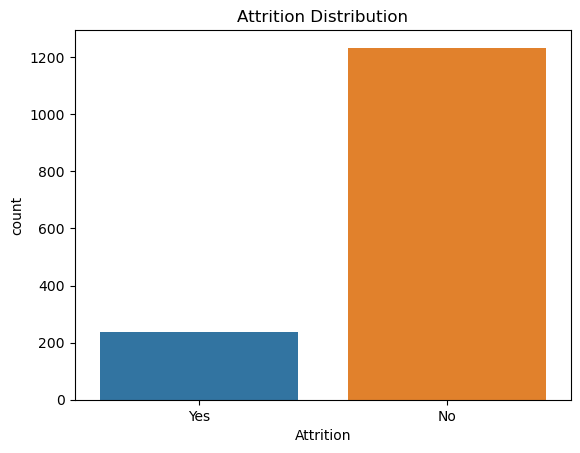

In [101]:
#Explore the distribution of a target attribute Attrition

sns.countplot(x='Attrition', data=df, )
plt.title('Attrition Distribution')
plt.show()

From the Attrition distribution graph we can see that the number of people who leave the company is very few. Most people actually stay.

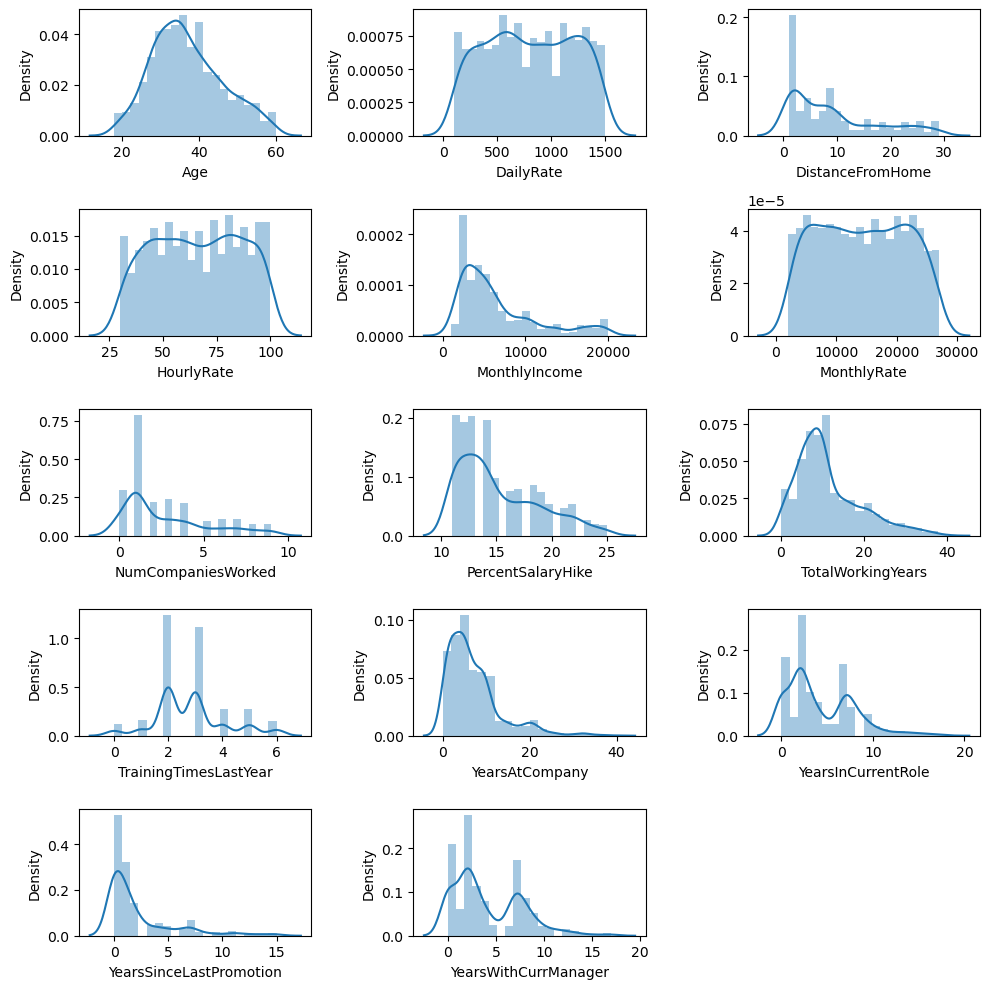

In [102]:
#Visualizing numerical features
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.distplot(df[column], bins=20)
plt.tight_layout()
plt.show()

Findings of Numerical Features;

Age:  Most employees are 30 to 40.

DistanceFromHome: Most of employees live close to the company with the most distance still below 10

MonthlyIncome: The majority of monthly income of employees are centred at around 5000. Only a few people get an income over 10000.

NumCompaniesWorked: Most employees have only worked for one company.

TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager: These time type features are right skewed which means that most people stay in the company for only for a few years.

DailyRate, HourlyRate, and MonthlyRate are distributed uniformly which might imply that the figure is similar in different intervals.

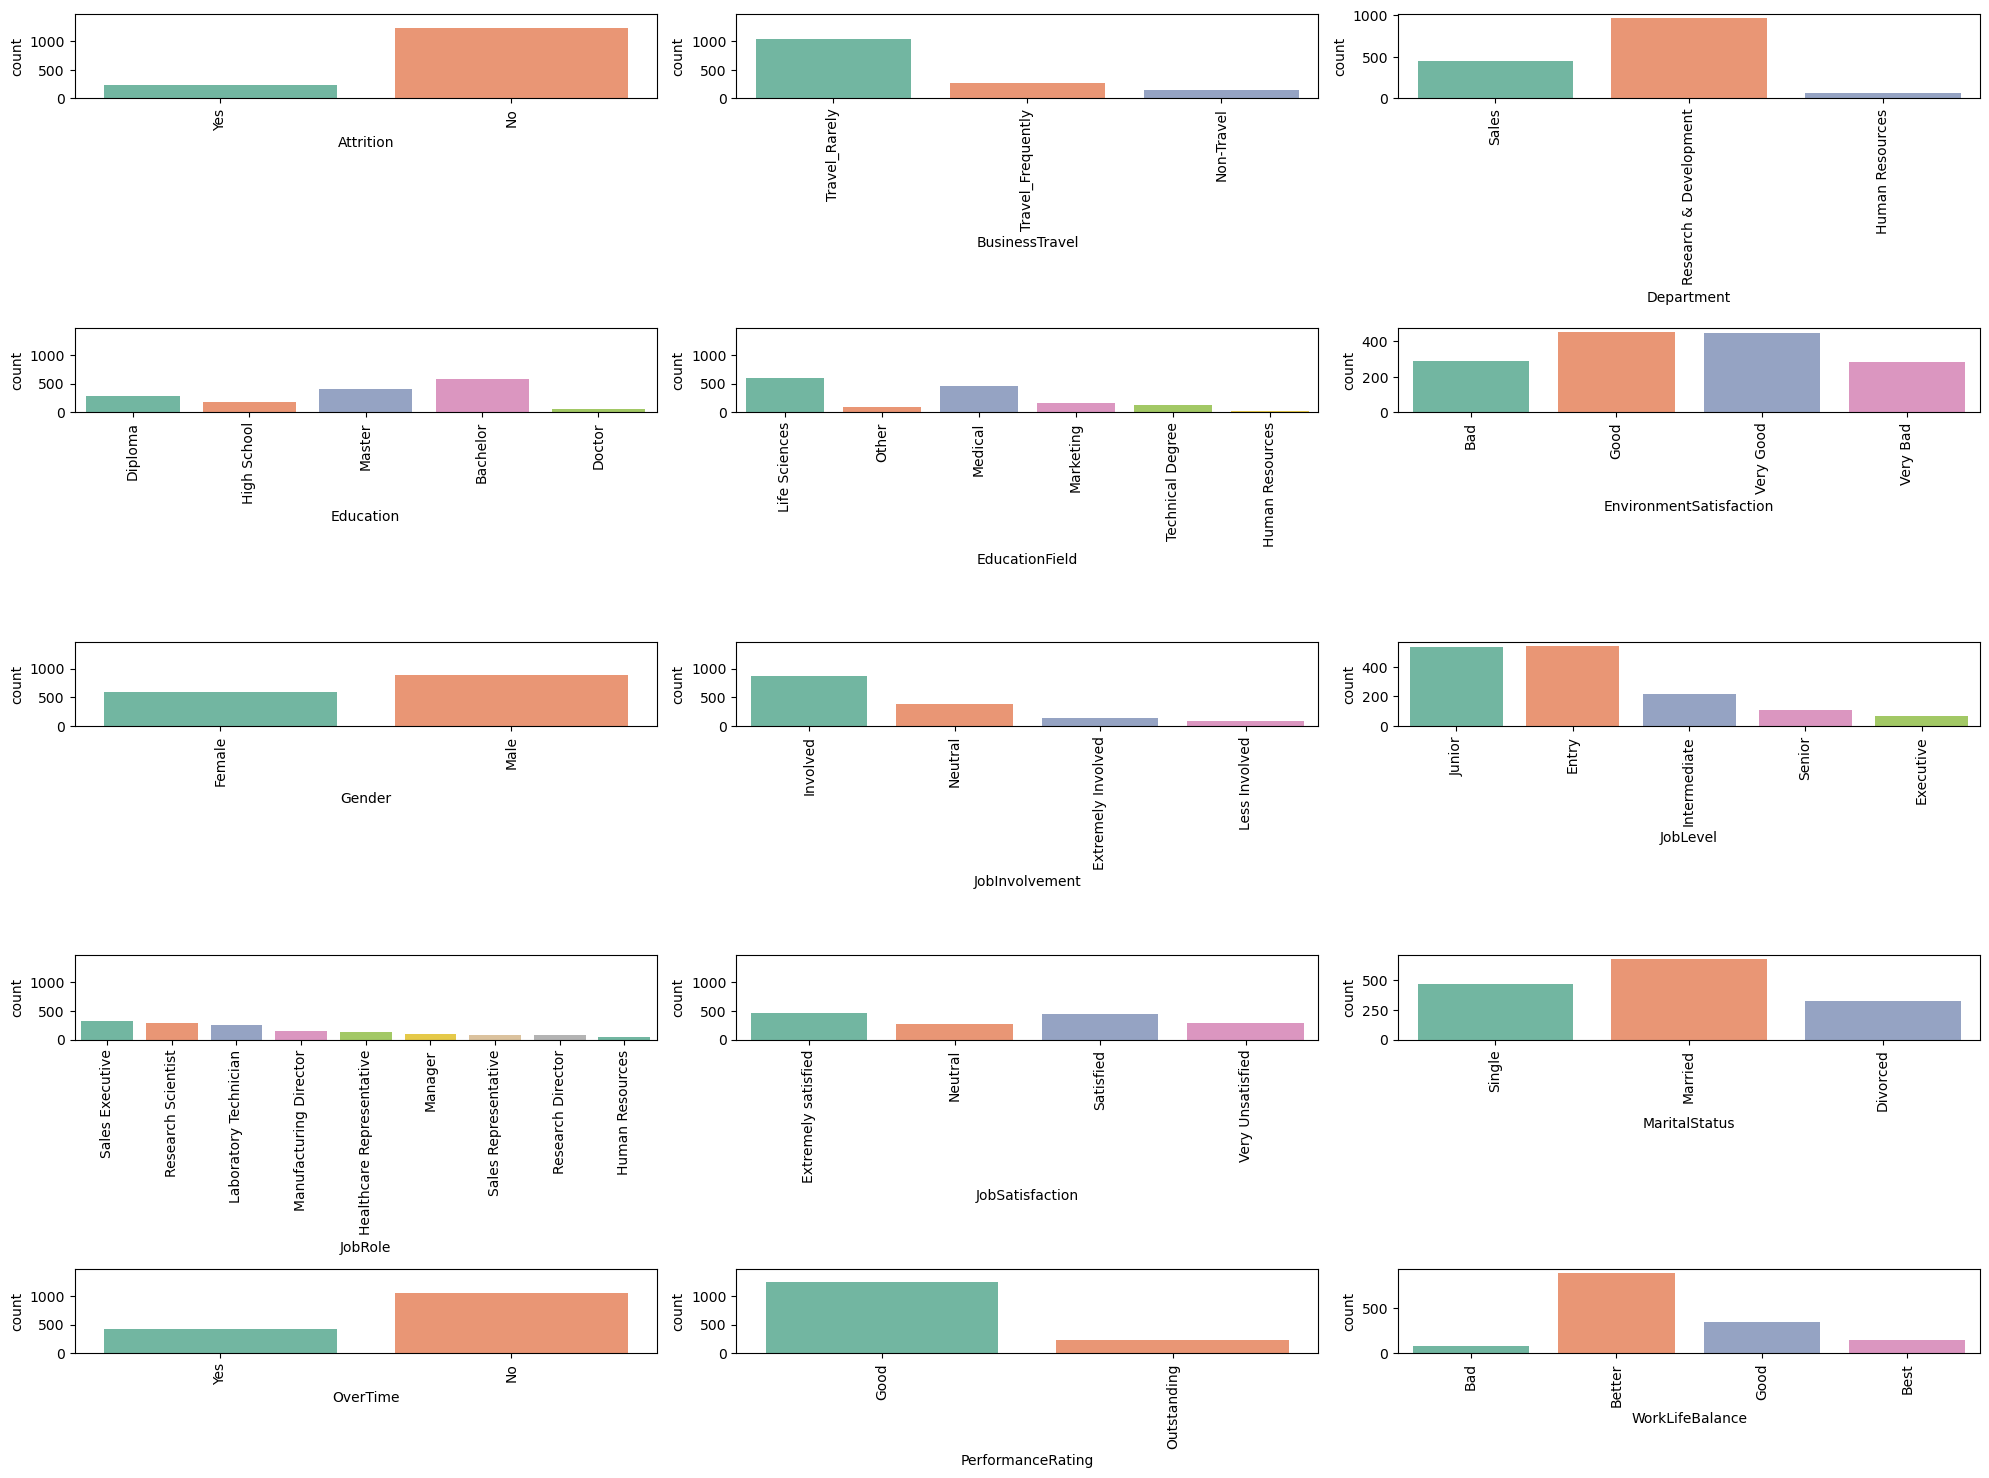

In [103]:
#Visualizing Categorical features
categorical_features = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 
                        'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
                        'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'WorkLifeBalance']

# Create subplots
plt.figure(figsize=(20, 20))
gridspec = plt.GridSpec(7, 3)
locator1, locator2 = [0, 0]

for column in categorical_features:
    plt.subplot(gridspec[locator1, locator2])
    sns.countplot(data=df, x=column, palette='Set2')
    plt.xticks(rotation=90)
    
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break

    # Set the y-axis limits to display more values
    plt.ylim(0, len(df))  

plt.tight_layout()
plt.show()

Categorical Feature Analysis

Attrition: The level of Attrition is
Gender: The company has more male employees
BusinessTravel: Most people in the company rarely travel
Department: Most employees are in the Research and Development department
EnvironmentSatisfaction: About 400 employees are satisfied with the environment
JobInvolvement: A big number of employees are involved in their job
JobLevel: Most employees are at the junior and entry level
OverTime: Most employees don't work overtime. Less than 500 employees have worked overtime
PerformanceRating: Most employees have good performance rating
WorkLifeBalance: Most employees have a better worklifebalance
   

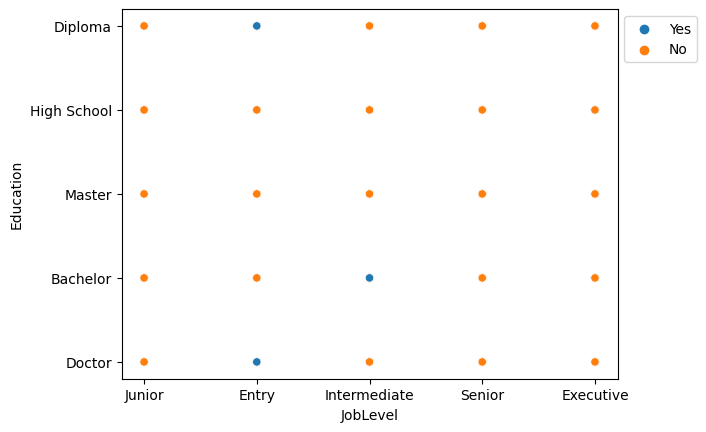

In [104]:
sns.scatterplot(x = 'JobLevel', y='Education', hue='Attrition', data=df,)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

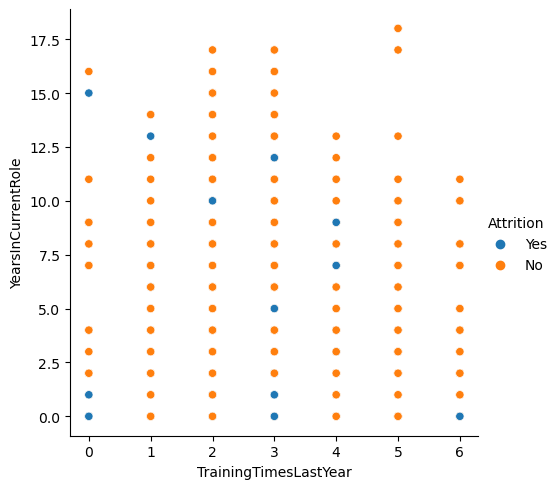

In [105]:
sns.relplot(x = 'TrainingTimesLastYear', y = 'YearsInCurrentRole', hue= 'Attrition', data=df)

Relationship between Attrition and numerical features

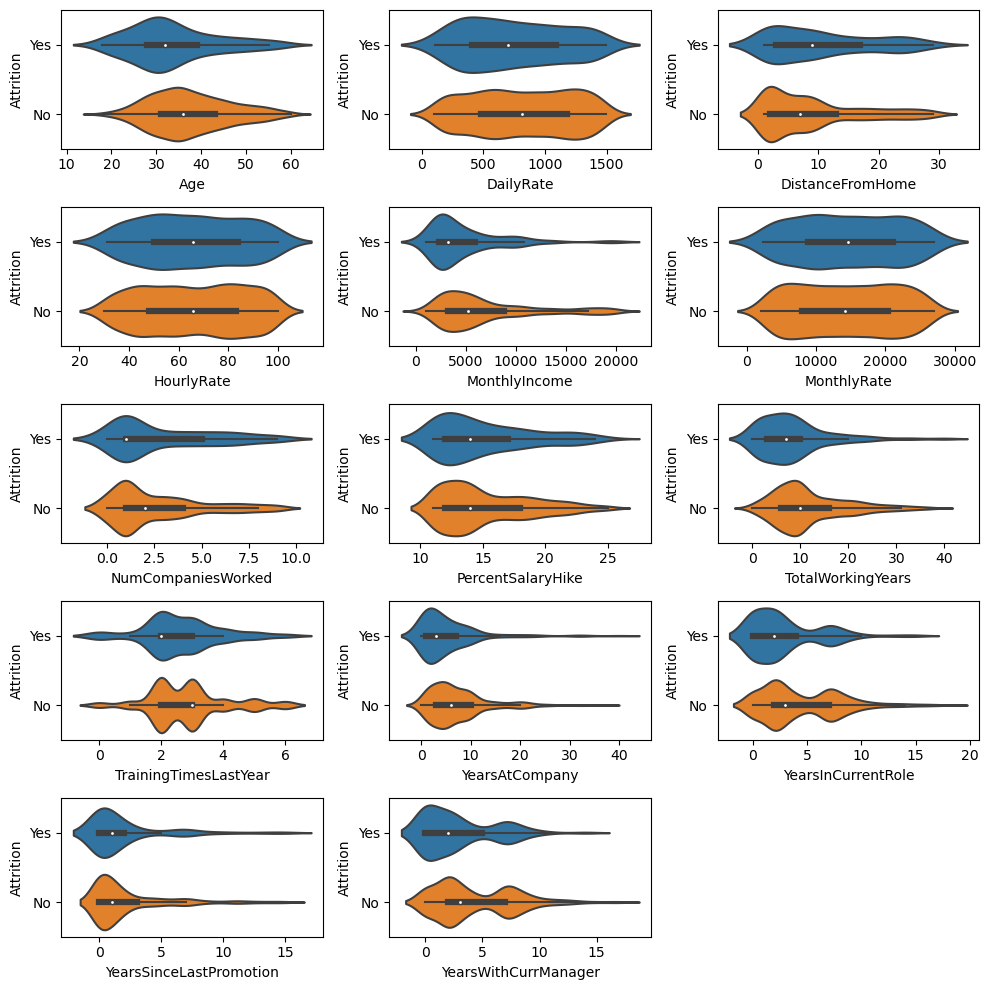

In [106]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.violinplot(data=df, x=column, y='Attrition')
plt.tight_layout()
plt.show()

Employees who have spent few years have a high attrition rate

Employees with a low monthly income are more likely to leave

Young employees below 35 are more likely to leave


RelationShip between Attrition and Categorical features

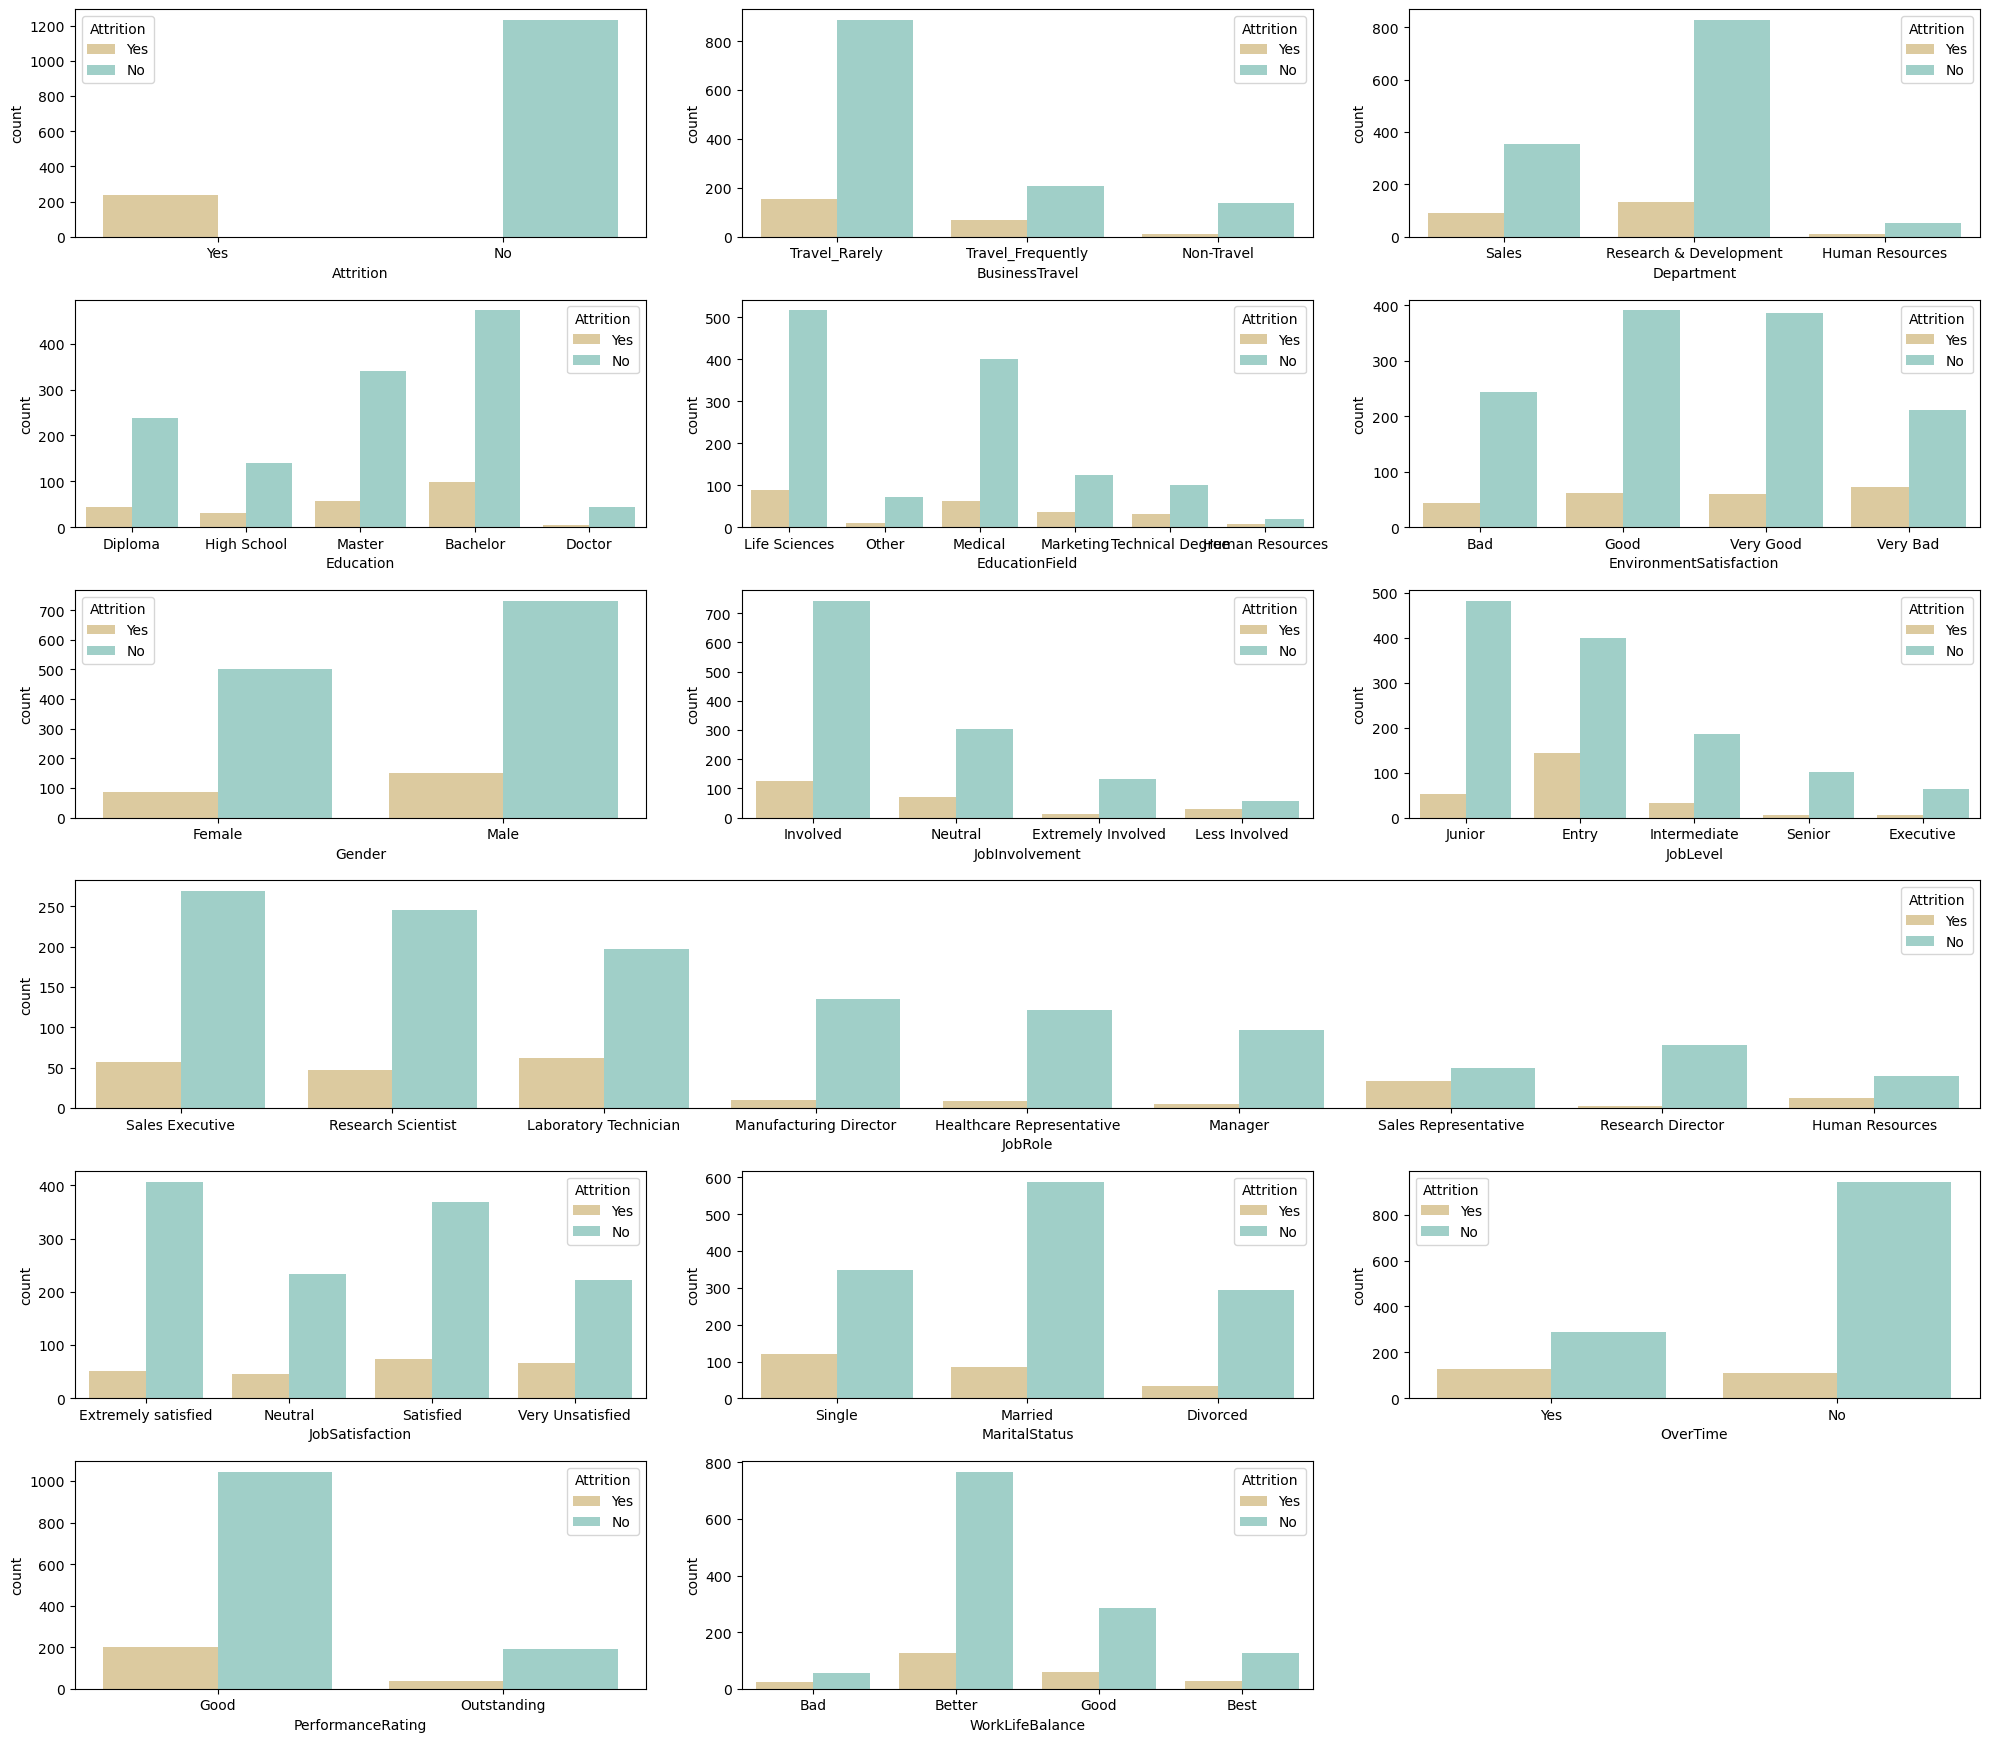

In [107]:
# Create subplots
plt.figure(figsize=(20, 20))
gridspec = plt.GridSpec(7, 3)
locator1, locator2 = [0, 0]

for column in categorical_features:
    if column == 'JobRole':
        plt.subplot2grid((7, 3), (locator1, locator2), colspan=3, rowspan=1)
        sns.countplot(x=column, hue='Attrition', data=df, palette='BrBG')
        locator1 += 1
        locator2 = 0
        continue
    plt.subplot2grid((7, 3), (locator1, locator2))
    sns.countplot(x=column, hue='Attrition', data=df, palette='BrBG')
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break
plt.tight_layout()
plt.show()

Employees who travel rarely are likely to leave 

Research and Development department has a high attrition rate

Many Employees with a very bad environment satisfaction leave the company

Many Sales representatives are leave

Many single people leave


## Task 2: Feature selection And Importance Analysis

Encoding categorical features using label encoding

In [108]:
for c_features in df.select_dtypes(include='object').columns:
    le = preprocessing.LabelEncoder()
    df[c_features] = le.fit_transform(df[c_features])
    print("Origin Classes:", list(le.classes_))

Origin Classes: ['No', 'Yes']
Origin Classes: ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Origin Classes: ['Human Resources', 'Research & Development', 'Sales']
Origin Classes: ['Bachelor', 'Diploma', 'Doctor', 'High School', 'Master']
Origin Classes: ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Origin Classes: ['Bad', 'Good', 'Very Bad', 'Very Good']
Origin Classes: ['Female', 'Male']
Origin Classes: ['Extremely Involved', 'Involved', 'Less Involved', 'Neutral']
Origin Classes: ['Entry', 'Executive', 'Intermediate', 'Junior', 'Senior']
Origin Classes: ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
Origin Classes: ['Extremely satisfied', 'Neutral', 'Satisfied', 'Very Unsatisfied']
Origin Classes: ['Divorced', 'Married', 'Single']
Origin Classes: ['No', 'Yes']
Origin Classes: ['Good', '

In [109]:
#Getting dummy values for features that have more than two categorical values

dummies = ['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'BusinessTravel']
df = pd.get_dummies(data=df, columns=dummies)
display(df.head())

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,BusinessTravel_0,BusinessTravel_1,BusinessTravel_2
0,41,1,1102,1,1,0,0,94,1,3,...,0,0,1,0,0,0,1,0,0,1
1,49,0,279,8,3,1,1,61,3,3,...,0,1,0,0,0,1,0,0,1,0
2,37,1,1373,2,1,3,1,92,3,0,...,0,0,0,0,0,0,1,0,0,1
3,33,0,1392,3,4,3,0,56,1,0,...,0,1,0,0,0,1,0,0,1,0
4,27,0,591,2,3,2,1,40,1,0,...,0,0,0,0,0,1,0,0,0,1


In [110]:
#Scaling numerical features

# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
scaled_data = scaler.fit_transform(df[numerical_features])
scaled_data = pd.DataFrame(scaled_data, columns=numerical_features)
scaled_data.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


In [111]:
#Updating the dataframe with the scaled data
for i in numerical_features:
    df[i] = scaled_data[i]
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,BusinessTravel_0,BusinessTravel_1,BusinessTravel_2
0,0.446350,1,0.742527,-1.010909,1,0,0,1.383138,1,3,...,0,0,1,0,0,0,1,0,0,1
1,1.322365,0,-1.297775,-0.147150,3,1,1,-0.240677,3,3,...,0,1,0,0,0,1,0,0,1,0
2,0.008343,1,1.414363,-0.887515,1,3,1,1.284725,3,0,...,0,0,0,0,0,0,1,0,0,1
3,-0.429664,0,1.461466,-0.764121,4,3,0,-0.486709,1,0,...,0,1,0,0,0,1,0,0,1,0
4,-1.086676,0,-0.524295,-0.887515,3,2,1,-1.274014,1,0,...,0,0,0,0,0,1,0,0,0,1


In [112]:
#Feature selection using decision tree based models


X = df.drop(columns=['Attrition'])

y = df['Attrition']

# Create and fit a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X, y)  # X are the features, y is the target variable

# Access feature importances
feature_importances = model.feature_importances_

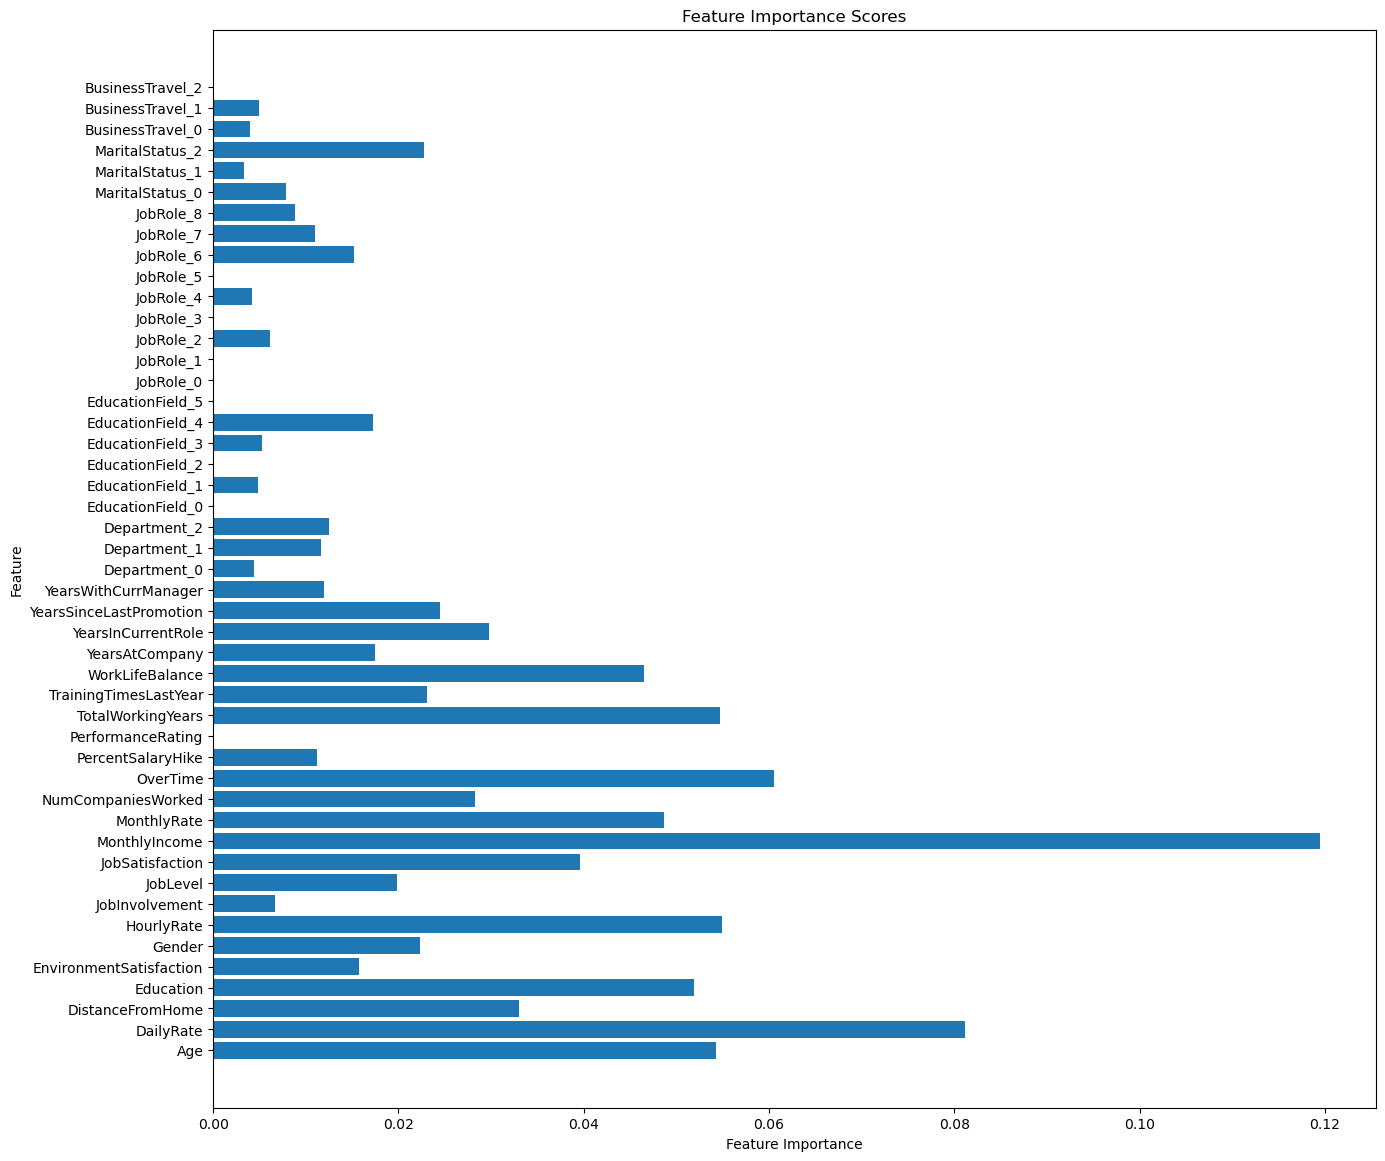

In [113]:
#Visualize feature Importance

feature_names = list(X.columns)  
plt.figure(figsize=(15, 14))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()

In [114]:
#Getting feature importance using correlation

# Calculate Pearson correlation coefficients
correlations = df.drop(columns=['Attrition']).apply(lambda x: x.corr(y))

# Take absolute values and sort in descending order
correlations = correlations.abs().sort_values(ascending=False)

# Print the ranked feature importances
print(correlations)

OverTime                   0.246118
JobLevel                   0.208212
MaritalStatus_2            0.175419
TotalWorkingYears          0.171063
YearsInCurrentRole         0.160545
MonthlyIncome              0.159840
Age                        0.159205
JobRole_8                  0.157234
YearsWithCurrManager       0.156199
YearsAtCompany             0.134392
BusinessTravel_1           0.115143
JobSatisfaction            0.103348
JobRole_2                  0.098290
MaritalStatus_1            0.090984
JobRole_5                  0.088870
MaritalStatus_0            0.087716
JobInvolvement             0.086911
Department_1               0.085293
JobRole_3                  0.083316
JobRole_4                  0.082994
Department_2               0.080855
JobRole_0                  0.078696
DistanceFromHome           0.077924
BusinessTravel_0           0.074457
EducationField_5           0.069355
WorkLifeBalance            0.059572
TrainingTimesLastYear      0.059478
DailyRate                  0

## Task 3: Model Building

from the bar graph, I decided to drop all the features whose feature importance is 0.00. 

In [115]:
#Selecting Features basing on importance

drops = ['PerformanceRating', 'Department_0', 'EducationField_0', 'EducationField_1', 'EducationField_2',
         'EducationField_5', 'JobRole_0', 'JobRole_3', 'JobRole_5', 'MaritalStatus_1', 'BusinessTravel_2']

df = df.drop(columns= drops)
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Department_1', 'Department_2',
       'EducationField_3', 'EducationField_4', 'JobRole_1', 'JobRole_2',
       'JobRole_4', 'JobRole_6', 'JobRole_7', 'JobRole_8', 'MaritalStatus_0',
       'MaritalStatus_2', 'BusinessTravel_0', 'BusinessTravel_1'],
      dtype='object')

Splitting the data into training, validation and testing sets

In [116]:
#Splitting the data into training and testing sets

X = df.drop(columns=['Attrition'])

y = df['Attrition']

# Split the dataset into 60% training and 40% temp test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)


Splitting the temp test into validation and test sets

In [117]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [123]:
#Train the model and fine-tune hyperparameters of the model

#create a decision tree with an entropy criterion
model = DecisionTreeClassifier(random_state=100)

#specify a dictionary of hyperparameters with the desired values to be used when fine tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 10]
}

#GridSearchCV object to perform grid search over the hyperparameters.
#classifier is the model, param_grid is the dictionary of hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy')


#fit the model
grid_search.fit(X_train, y_train)

#get the best hyperparameters
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

Learning Curve to see how the decision tree model is learning using the training and validation set

In [124]:
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the validation and training learning curve.

    Parameters:
    - estimator: best_classifier
    - title: Title of the learning curve plot
    - X: Features
    - y: Target variable
    - cv: Cross-validation strategy (e.g., StratifiedKFold)
    - train_sizes: Array of training set sizes
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")

    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
             label="validation score")

    plt.legend(loc="best")
    return plt





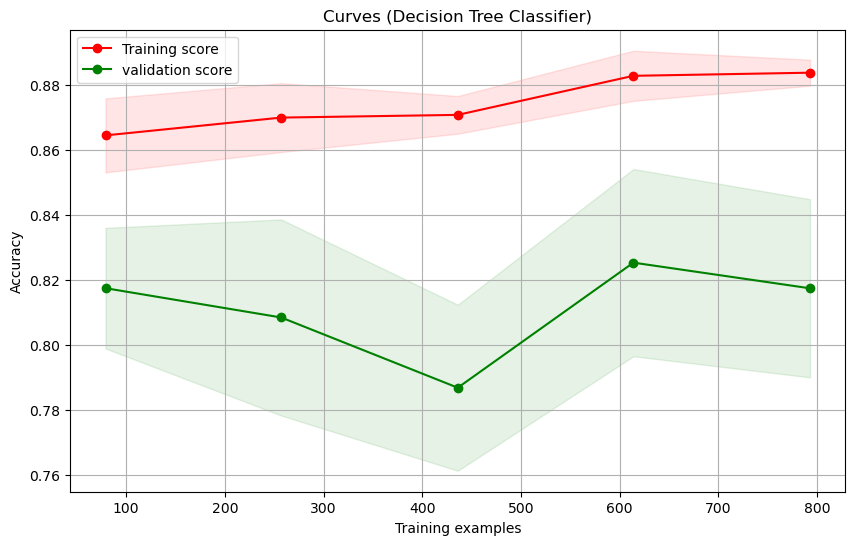

In [125]:
from sklearn.model_selection import StratifiedKFold

title = "Curves (Decision Tree Classifier)"
cv = StratifiedKFold(n_splits=10)
plot_learning_curve(best_classifier, title, X_train, y_train, cv=cv)

plt.show()

From the learning curve, there is a big gap between the training and validation curves which shows a high variance between the model as the data increases. The training curve starts at approximately 0.87 accuracy and increases as the data increases. The validation curve starts at a lower accuracy and decreases as the data set increases until when the data set is 400 and increases to an accuracy of approximately 0.83 before it eventually drops. 

The training data set is insufficient for the model to do well. The model could benefit from more data. 

## Task 4: Model Training, Testing and Evaluation

In [126]:
#Making predictions
y_predictions = best_classifier.predict(X_test)

#Evaluating Performance of the model
accuracy = accuracy_score(y_test, y_predictions)*100
confusion = confusion_matrix(y_test, y_predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Report : ", classification_report(y_test, y_predictions))


Accuracy: 84.35374149659864
Confusion Matrix:
 [[236  15]
 [ 31  12]]
Report :                precision    recall  f1-score   support

           0       0.88      0.94      0.91       251
           1       0.44      0.28      0.34        43

    accuracy                           0.84       294
   macro avg       0.66      0.61      0.63       294
weighted avg       0.82      0.84      0.83       294



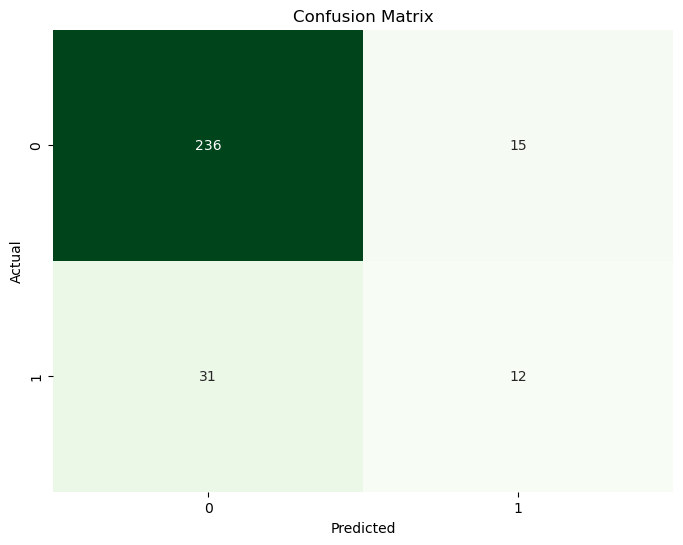

In [127]:
#Visualizing the performance of a decision tree using a confusion matrix
# Create a heatmap of the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Discussing the results Accuracy and Confusion matrix

The model correctly predicts the employee attrition status in about 84.35% of the cases.

Top-left (True Negatives): 236 employees correctly predicted as not having attrition.
Top-right (False Positives): 15 employees incorrectly predicted as having attrition when they don't.
Bottom-left (False Negatives): 31 employees incorrectly predicted as not having attrition when they do.
Bottom-right (True Positives): 12 employees correctly predicted as having attrition.


#Discussing precision and recall

Precision (0.88 for class 0 and 0.44 for class 1): 

Precision measures the accuracy of positive predictions. For employees who didn't leave (class 0), the precision is high at 0.88, meaning that when the model predicts that an employee will stay, it's correct 88% of the time. 

For employees who did leave (class 1), the precision is lower at 44, indicating that when the model predicts attrition, it's correct 44% of the time.


Recall (0.94 for class 0 and 0.28 for class 1): 

Recall measures the ability of the model to correctly identify positive instances. For employees who didn't leave, the recall is high at 0.94, indicating that the model correctly identifies 94% of employees who stayed. 

For employees who did leave, the recall is lower at 0.28, suggesting that the model only captures 28% of employees who actually left.

Recommendations for the company

Many employees are likely to leave because of a number of reasons but the company should pay attention to the reasons below as they were the most frequent; Monthly income, hourlyrate, dailyrate, overtime, age, jobsatisfaction, worklifebalance, trainingtimeslastyear, and totalworkingyears. 